In [ ]:
!pip install opencv-contrib-python==3.4.2.17 --force-reinstall

import numpy as np
import cv2
import matplotlib.pyplot as plt
from tqdm.auto import tqdm
from sklearn import linear_model
from sklearn.metrics import r2_score

from google.colab import drive
drive.mount('/content/drive')

In [ ]:
def confirm_checksum(filename, true_checksum):
  import subprocess
  checksum = subprocess.check_output(['shasum',filename]).decode('utf-8')
  assert checksum.split(' ')[0] == true_checksum, 'Checksum does not match for ' + filename + ' redownload the data.'

In [ ]:
confirm_checksum('/content/drive/MyDrive/CV Notebooks/CV Report/training_images.npz', 
                 'f313a54fc57a1235e6307d176fc5fc83fd7ec530')
data = np.load('/content/drive/MyDrive/CV Notebooks/CV Report/training_images.npz', 
               allow_pickle=True)
# training validation splits 10:90 = 281, 20:80 = 562, 30:70 = 843, 40:60 = 1124, 
# 50:50 = 1406, 60:40 = 1687, 70:30 = 1968, 80:20 = 2250 (chosen), 90:10 = 2530
images = data['images'][:2250]
pts = data['points'][:2250]
valid_images = data['images'][2250:]
valid_pts = data['points'][2250:]
print('Training Images Shape:  ', images.shape)
print('Training Points Shape:  ', pts.shape)
print('Validation Images Shape:', valid_images.shape)
print('Validation Points Shape:', valid_pts.shape)


confirm_checksum('/content/drive/MyDrive/CV Notebooks/CV Report/test_images.npz', 
                 '4b9efd8eb3b87c07d9c5400ef2494d476bc318a3')
test_data = np.load('/content/drive/MyDrive/CV Notebooks/CV Report/test_images.npz', 
                    allow_pickle=True)
test_images = test_data['images']
print('Test Images Shape:      ', test_images.shape)


confirm_checksum('/content/drive/MyDrive/CV Notebooks/CV Report/examples.npz', 
                 'bf51ebbf42f17e3cbe06bb299746565c53d16c40')
example_data = np.load('/content/drive/MyDrive/CV Notebooks/CV Report/examples.npz', 
                    allow_pickle=True)
example_images = example_data['images']
print('Example Images Shape:   ', example_images.shape)

Training Images Shape:   (2250, 244, 244, 3)
Training Points Shape:   (2250, 42, 2)
Validation Images Shape: (561, 244, 244, 3)
Validation Points Shape: (561, 42, 2)
Test Images Shape:       (554, 244, 244, 3)
Example Images Shape:    (6, 244, 244, 3)


# Lip Color Modification

In [ ]:
def modify_lip_color(img, pts, color):
    # creating an empty (black) mask of the same shape as the original image
    mask = np.zeros_like(img)
    # getting the points representing the lip's location
    lip_pts = pts[22:]
    # filling the lip's location in the mask with white
    cv2.fillPoly(mask, np.int32([lip_pts]), (255, 255, 255))
    # extracting just the lip from the original image and storing the result in the mask
    mask = cv2.bitwise_and(img,mask)
    # applying a morphological close operation to fill small holes for a more realistic result, a (5, 5) 
    # kernel size is used so that large holes (representing an opened mouth for example) remain unfilled
    kernel = np.ones((5, 5),np.uint8)
    mask = cv2.morphologyEx(mask, cv2.MORPH_CLOSE, kernel)
    # blurring the lips, also adds to the realism of the final result
    mask = cv2.GaussianBlur(mask, (15, 15), cv2.BORDER_DEFAULT)
    # creating an empty image with the same shape as the mask
    lip_img = np.zeros_like(mask)
    # assigning all pixels in the new image with the given color
    lip_img[:] = color
    # making all parts of the new image black, except for the lip which now has the new color applied to it
    lip_img = cv2.bitwise_and(mask, lip_img)
    # comibing the colored lip image and the original image to get the final new image
    final_image = cv2.addWeighted(img,1,lip_img,0.5,0)
    return final_image

22


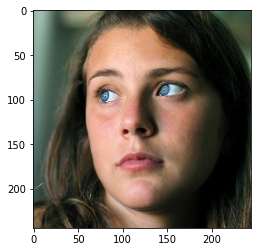

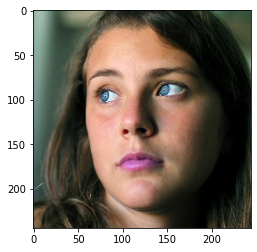

107


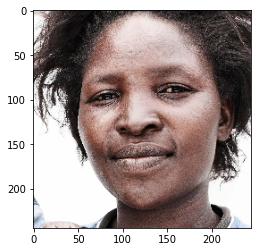

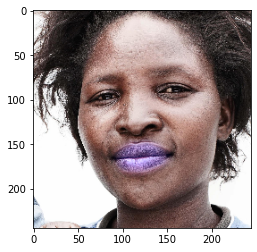

62


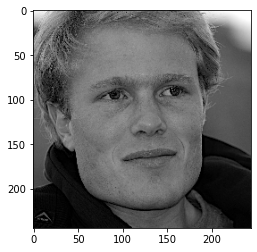

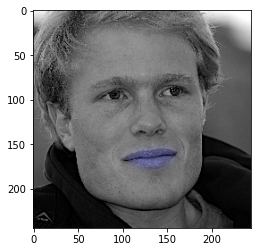

35


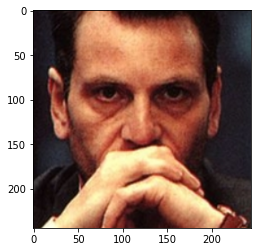

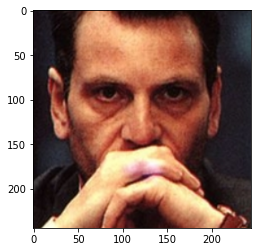

81


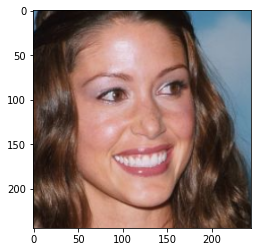

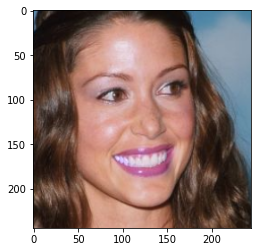

In [ ]:
idxs = [22, 107, 62, 35, 81]
for idx in idxs:
    print(idx)
    plt.imshow(images[idx])
    plt.show()
    plt.imshow(modify_lip_color(images[idx], pts[idx], (0, 0, 255)))
    plt.show()

22


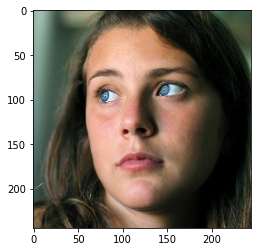

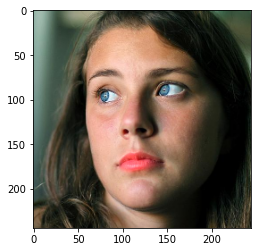

107


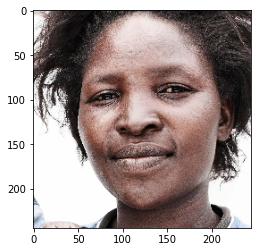

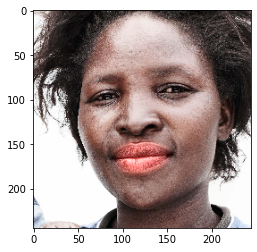

62


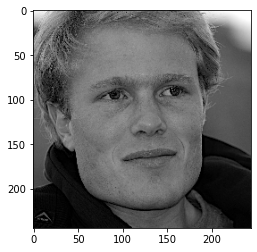

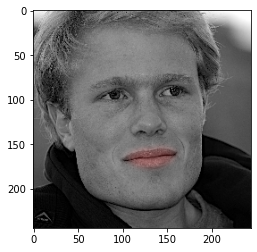

35


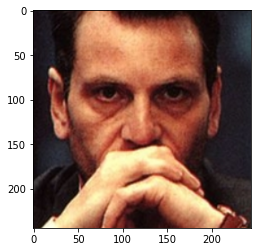

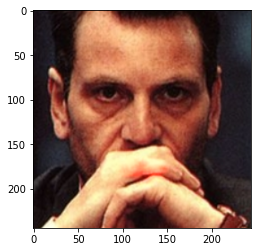

81


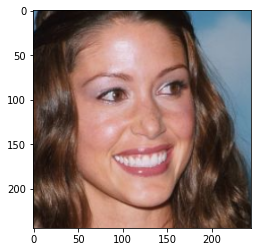

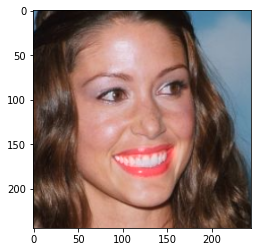

In [ ]:
idxs = [22, 107, 62, 35, 81]
for idx in idxs:
    print(idx)
    plt.imshow(images[idx])
    plt.show()
    plt.imshow(modify_lip_color(images[idx], pts[idx], (255, 0, 0)))
    plt.show()